## Clustering Shopping data for Marketing Team

Here's a customer dataset with age, gender, income, and spending score. Our goal is to identify different customer types using K-means clustering. K-means is ideal for this task as it groups similar customers together. By analyzing the clusters, we can understand customer behavior and preferences, enabling personalized marketing strategies.

### Data Import and Exploration

In [ ]:
# Importing libraries: pandas for data manipulation, numpy for numerical computation, matplotlib for plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# storing path o dataset in a variable called path so that it can be used and changed easily
path = "C:/Users/rooki/OneDrive/Desktop/mall data/Mall_Customers.csv"

In [ ]:
# loading the dataset into a variable called mall_data using pandas
mall_data = pd.read_csv(path)
mall_data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
# checking the shape of the dataset
mall_data.shape

(200, 5)

the size of the dataset is 200 rows and 5 columns
checking the first 5 rows of the dataset
- customer_id : this is the id of the customer
- Genre : this is the Sex of the customer
- age : this is the age of the customer
- Annual Income( in k dollars) : this is the annual income of the customer in Dollars (Thousand Dollars)
- spending score: this is a score ranging from 1 - 100 given to the customer based on his/her spending history

In [ ]:
# lets check for missing values
mall_data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
# there are no missing values in the dataset
# we can porceed with the analysis
# we will remove the customer id column as it is not required for the analysis
mall_data.drop(columns = ['CustomerID'], inplace = True)
mall_data

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [ ]:
# lets check the data types of the columns
mall_data.dtypes

Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
# simple desciptive statistics of the dataset
mall_data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [ ]:
# rename Genre column to Gender
mall_data.rename(columns={'Genre': 'Gender'}, inplace=True)

In [ ]:
mall_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


### data Visualization

([<matplotlib.patches.Wedge at 0x2b0aec1c2b0>,
 [Text(-0.20611945413751356, 1.080515974257694, 'Female'),
  Text(0.20611945413751367, -1.080515974257694, 'Male')],
 [Text(-0.11242879316591647, 0.5893723495951058, '56.0%'),
  Text(0.11242879316591654, -0.5893723495951058, '44.0%')])

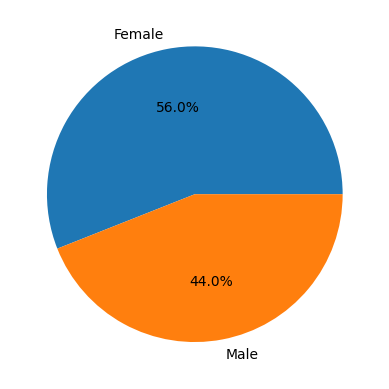

In [ ]:
# lets plot a pie chart to see Gender distribution
gender_counts = mall_data['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')

In [ ]:
# count the number of males and females in the Gneder column
gender_counts = mall_data['Gender'].value_counts()

# Print the counts
print(gender_counts)

Gender
Female    112
Male       88
Name: count, dtype: int64


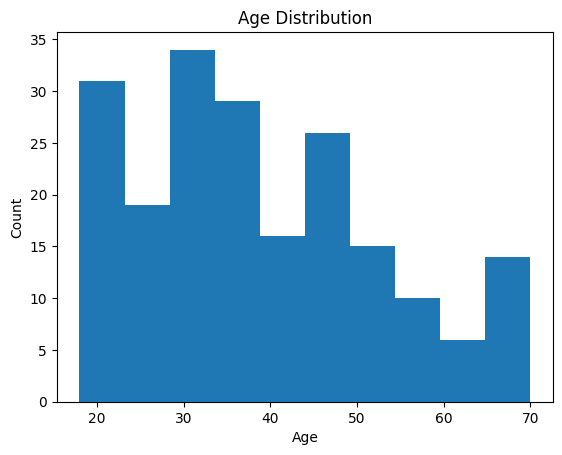

In [ ]:
# lets plot a histogram for age
plt.hist(mall_data['Age'])
# make the plot prettier by adding labels
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

we can see that age of customers is ditributed preety uniformly with maximum customers being arounf 28-35 years of age.
The age group around 60 years, has the least amount of customers.

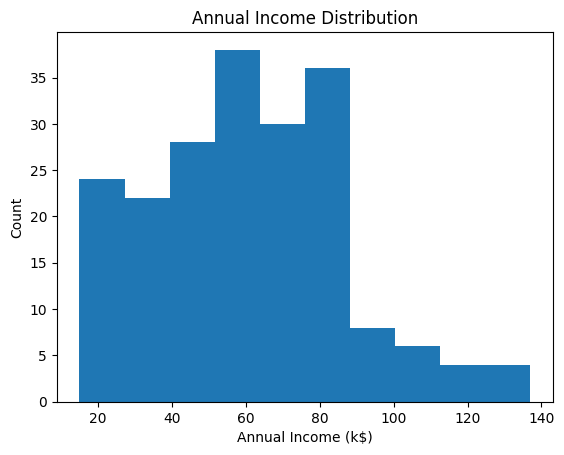

In [ ]:
# lets plot a histogram for annual income
plt.hist(mall_data['Annual Income (k$)'])
# make the plot prettier by adding labels
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.title('Annual Income Distribution')
plt.show()

In [ ]:
max(mall_data['Annual Income (k$)'])

137

In [ ]:
min(mall_data['Annual Income (k$)'])

15

- The salaries range from 15k USD to 137K USD
- maximum customers have a salary of around 50-60K USD

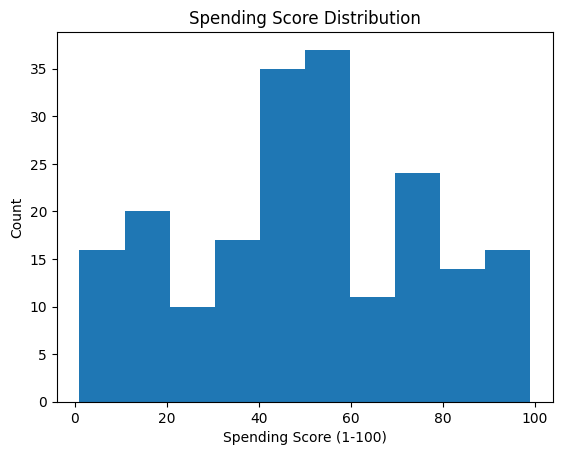

In [ ]:
# lets visualize the spending score
plt.hist(mall_data['Spending Score (1-100)'])
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')
plt.title('Spending Score Distribution')
plt.show()

- we can see that the spending score is normally distributed and max of the customers have a spending score of 40-60

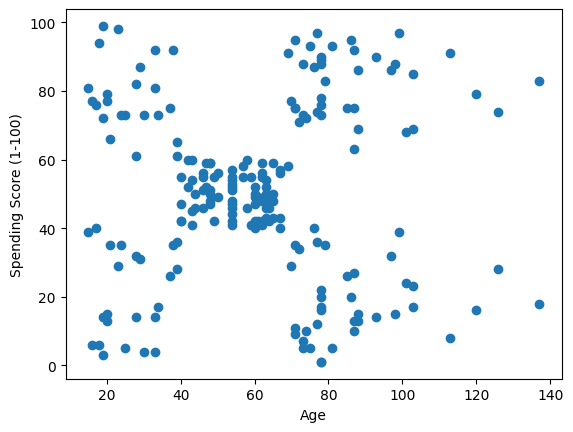

In [ ]:
# lets visualize a scatter plot between Annual income and spending score
plt.scatter(mall_data['Annual Income (k$)'], mall_data['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
# the reason we are chooing these two variables is because we want to segment the customers based on their spending score and annual income
# we chose spending score because it is a measure of how much a customer spends in a mall and annual income because it is a measure of how much a customer earns in a year
# age does not matter since low age does not mean low spending score and vice versa
# same goes for Gender

- we can observve that there is no correlation between Annual Income and spending score but we can see that there are some clusters,
- we can use k means clustering to find the clusters.
- we will use elbow method to find the optimal number of clusters.
- This cluster will be used to find the target customers for the mall, the marketing team can use this information to target the customers specifically based on their spending score and annual income given by the clusters.

### K - Means Clustering Model

In [ ]:
# Lets import modules to train and test our k means model
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

# lets create a copy of the dataset
mall_data_copy = mall_data.copy()

In [ ]:
# remove Gender column as it is categorical
mall_data_copy.drop('Gender', axis=1, inplace=True)

In [ ]:
mall_data_copy

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [ ]:
# split the dataset ito train and test
train, test = train_test_split(mall_data_copy, test_size = 0.2, random_state = 0)
# lets print the shape of train and test
print(train.shape)
print(test.shape)

(160, 3)
(40, 3)


c:\Users\rooki\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rooki\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rooki\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rooki\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

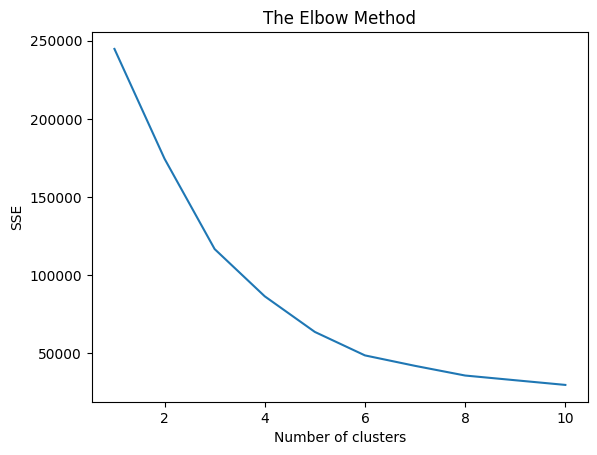

In [ ]:
# lets train our k means model on the train dataset and test it on the test dataset
# But first lets create a list to store the SSE values for each k value
sse = []
# see is the sum of squared errors, this is used to find the optimal number of clusters
# lets create a for loop to iterate through k values from 1 to 10
for k in range(1, 11):
    # lets create a k means model with k clusters
    kmeans = KMeans(n_clusters = k, random_state = 0)
    # lets fit the model on the train dataset
    kmeans.fit(train)
    # lets append the SSE value to the list
    sse.append(kmeans.inertia_)
# lets plot the SSE values against k values
plt.plot(range(1, 11), sse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

- here is explanation of the elbow method
- The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset.
- Inertia is the sum of squared error for each cluster. Therefore the smaller the inertia the denser the cluster(closer together all the points are)
- The Elbow method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn’t give much better modeling of the data.
- More precisely, if one plots the percentage of variance explained by the clusters against the number of clusters, the first clusters will add much information (explain a lot of variance), but at some point the marginal gain will drop, giving an angle in the graph.


In [ ]:
X = mall_data_copy.iloc[:, [1, 2]].values # in this line, we are taking the annual income and spending score columns
X # lets print X which is a numpy array, this is beacuse the k means model takes numpy arrays as input and not dataframes

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42) # we are creating a k means model with 5 clusters and random state of 42
# next we will fit the model on X
y_kmeans = kmeans.fit_predict(X)

c:\Users\rooki\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


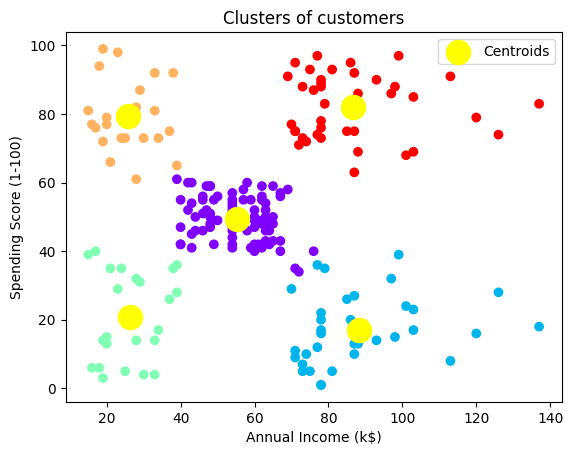

In [ ]:
# print a scatter plot to visualise our clusters  with k = 5
plt.scatter(X[:,0], X[:,1], c=y_kmeans, cmap='rainbow') # X[:,0] is the annual income column and X[:,1] is the spending score column , c = y_kmeans is the cluster column and cmap is the color map
# add label to the plot
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
# add labels for  each cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.legend()
# show the plot
plt.show()

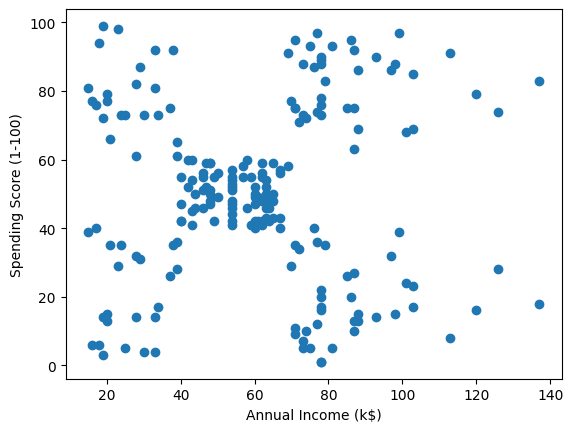

In [ ]:
# visual the mall_data dataset to complare it with our model
plt.scatter(mall_data['Annual Income (k$)'], mall_data['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

- in conclusion we have created a k means model with 5 clusters and we have visualised the clusters
- this will help the mall to target customers based on their spending score and annual income
- moreover we have compared the mall_data dataset with our kmeans model to see how well our model has performed

### Prescriptive Analysis

- Here is a prescriptie analysis of the above data
- Cluster(Blue Color) -> earning high but spending less
- cluster(Purple Color) -> average in terms of earning and spending
- cluster(Red Color) -> earning high and also spending high [TARGET SET]
- Cluster(brown Color) -> earning less but spending more
- Cluster(Green Color) -> Earning less , spending less

- Here is my recommendation
- We can target customers in cluster 3 as they are earning high and also spending high
- We can also target customers in cluster 4 as they are earning less but spending more